In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# load data 
df = pd.read_csv('70d553a3f7a666707fa83df275ae2272a050574299736d2087c7c5b7.csv')

In [3]:
# data transformations
df['Date'] = pd.to_datetime(df['Date'])
df['Temps'] = df['Data_Value']*0.1

# set date as index, and remove leap year day
df.set_index('Date', inplace = True)
df = df[~((df.index.month == 2) & (df.index.day == 29))]

In [5]:
# split 2005-14 and 2015 data  
df15 = df[df.index.year == 2015]
df = df[df.index.year != 2015]

In [6]:
# process 2005-14 data
df = df.groupby([df.index.month.rename('month'), df.index.day.rename('day')], 
                  as_index=True).Temps.agg(['max','min'])
df.columns = ['high', 'low']
df.index = df.index.map(lambda x: pd.to_datetime('2015-{}-{}'.format(x[0],x[1]),format='%Y-%m-%d'))

In [8]:
# process 2015 data
df15 = df15.groupby([df15.index.month.rename('month'), df15.index.day.rename('day')], 
                  as_index=True).Temps.agg(['max','min'])
df15.columns = ['high15', 'low15']
df15.index = df15.index.map(lambda x: pd.to_datetime('2015-{}-{}'.format(x[0],x[1]),format='%Y-%m-%d'))

In [10]:
# join dataframes for 2005-14 and 2015. find 2015 record highs and lows.
df = df.join(df15, how = "inner")
record_high = df[df['high15'] > df['high']].high15
record_low = df[df['low15'] < df['low']].low15

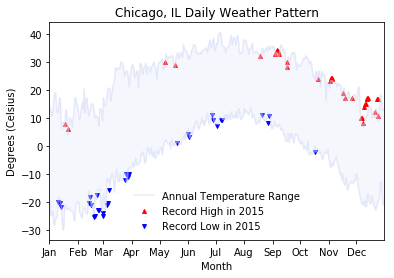

In [67]:
# Create Weather Pattern Visual
fig = plt.figure()
plt.plot(df.index, df.high, color = '#CED8F6', alpha = 0.5, label = 'Annual Temperature Range')
plt.plot(df.index, df.low, color = '#CED8F6', alpha = 0.5, label = '_nolegend_')
plt.scatter(record_high.index,record_high, s = 15, color = 'red', marker = '^', label = 'Record High in 2015')
plt.scatter(record_low.index, record_low, s = 15, color = 'blue', marker = 'v', label = 'Record Low in 2015')
plt.gca().fill_between(df.index,df.high, df.low, facecolor = '#CED8F6', alpha = 0.2)
plt.legend(frameon = False)

months = mdates.MonthLocator()
frmt = mdates.DateFormatter('%b')
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(frmt)
plt.gca().set_xlim(['2015-01-01','2015-12-31'])

plt.xlabel('Month')
plt.ylabel('Degrees (Celsius)')
plt.title('Chicago, IL Daily Weather Pattern')
fig.savefig('Chicago_Weather_Pattern.png')